# Cluster 聚类算法比较

## 1. 生成数据集

In [96]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans, AffinityPropagation, MeanShift, SpectralClustering, DBSCAN, Birch

In [98]:
clusters_names = ['KMeans', 'AffinityPropagation', 'MeanShift', 'SpectralClustering', 'DBSCAN', 'Birch']
clusters = [KMeans, AffinityPropagation, MeanShift, SpectralClustering, DBSCAN, Birch]


def plot_cluster(data, label, title='Origin Cluster'):
    n = np.max(label) + 1
    
    colors = ['r', 'b', 'y', 'g', 'c', 'm', 'k']
    markers = ['o', 'x', '<', '>', '1', '2']
    
    plt.clf()
    plt.title(title)
    
    for i in range(n):
        cluster = np.array([data[j] for j, v in enumerate(label) if v == i])
        plt.scatter(cluster[:, 0], cluster[:, 1], color=colors[i % 7], marker=markers[i % 6], label=str(i))
    
    plt.legend(loc = 'upper right')
    
def predict_cluster(data, name, **kwargs):
    method = clusters[clusters_names.index(name)]
    model = method(**kwargs)
    result = model.fit_predict(data)
    print('result: ', result)
    plot_cluster(data, result, name)

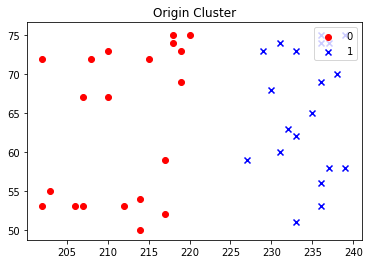

In [48]:
oranges =  np.array([(random.randint(200, 220), random.randint(50, 75)) for _ in range(20)])
apples = np.array([(random.randint(227, 240), random.randint(50, 75)) for _ in range(20)])
data = np.append(oranges, apples, axis=0)
label = np.array([0] * 20 + [1] * 20) 
plot_cluster(data, label)

## 2.1 KMeans

result:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]


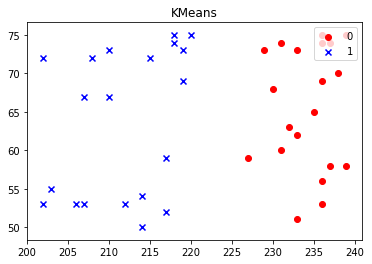

In [87]:
# 点之间的距离
predict_cluster(data, 'KMeans', n_clusters=2)

## 2.2 Affinity Propagation

result:  [1 0 0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 2 2 2 2 3 2 3 3 3 2 2 2 3 2 3 2 3
 3 3 3]


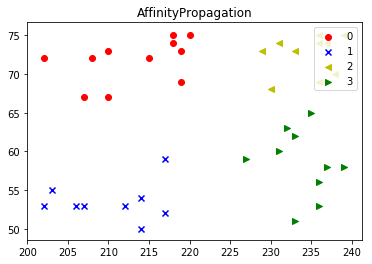

In [101]:
# 图之间的距离（最近邻图），n不可扩展
predict_cluster(data, 'AffinityPropagation')

## 2.3. MeanShift

result:  [2 1 1 1 1 2 1 2 2 1 2 1 2 1 2 1 1 2 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]


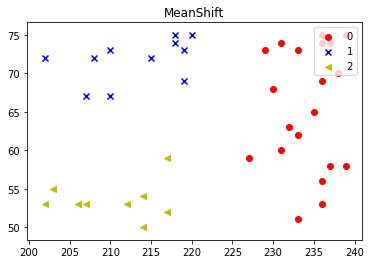

In [103]:
# 点之间的距离，n不可扩展
predict_cluster(data, 'MeanShift')

## 2.4. SpectralClustering

result:  [0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]


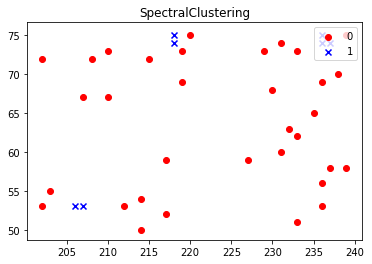

In [90]:
# 最近临图，n可扩展
predict_cluster(data, 'SpectralClustering', n_clusters=2)

## 2.5 DBSCAN

result:  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


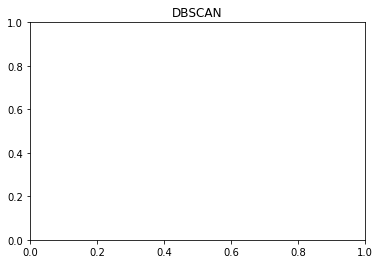

In [104]:
# 最近点，n不可扩展，适合非常大的n
predict_cluster(data, 'DBSCAN', min_samples=2)

## 2.6 Birch

result:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]


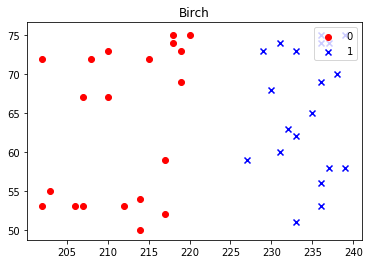

In [106]:
# 欧式距离，n可扩展，适合大数据集，大n
predict_cluster(data, 'Birch', n_clusters=2)

## 3. 参考文档

- [sklearn 聚类官方文档](http://sklearn.apachecn.org/cn/0.19.0/modules/clustering.html)